In [1]:
%matplotlib inline

In [2]:
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
class OVRSVC():
    def __init__(self, **kwargs):
        self.c2svc = {}
        self.kwargs = kwargs
    
    def fit(self, X, y):
        for c in set(i for i in y):
            self.c2svc[c] = LinearSVC(**self.kwargs)
            self.c2svc[c].fit(X, y==c)
        return self
    
    def predict(self, X):
        confidences = np.zeros((X.shape[0], len(self.c2svc)))
        for c, svc in self.c2svc.items():
            confidences[:, int(c)] = svc.decision_function(X)
        result = confidences.argmax(axis=1)
        return result

    def score(self, X, y):
        result = self.predict(X)
        score = (result == y).sum() / len(y)
        return score

In [4]:
scaler = MinMaxScaler(copy=False)

X_train = np.load('data_hw2/train_data.npy')
y_train = np.load('data_hw2/train_label.npy').astype(int) + 1
# X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.5)
X_test = np.load('data_hw2/test_data.npy')
y_test = np.load('data_hw2/test_label.npy').astype(int) + 1

scaler.fit(X_train)
X_train = scaler.transform(X_train)
# X_dev = scaler.transform(X_dev)
X_test = scaler.transform(X_test)

In [19]:
pca = PCA(n_components=2)
pca.fit(X_train)
# pca.fit(np.concatenate((X_train, X_test)))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [90]:
X_train_r = pca.transform(X_train)
X_dev_r = pca.transform(X_dev)
X_test_r = pca.transform(X_test)
np.random.shuffle(X_train_r)
np.random.shuffle(X_dev_r)
np.random.shuffle(X_test_r)

In [20]:
X_train_r_0 = np.random.permutation(pca.transform(X_train[y_train == 0]))
X_test_r_0 = np.random.permutation(pca.transform(X_test[y_test == 0]))
X_train_r_1 = np.random.permutation(pca.transform(X_train[y_train == 1]))
X_test_r_1 = np.random.permutation(pca.transform(X_test[y_test == 1]))
X_train_r_2 = np.random.permutation(pca.transform(X_train[y_train == 2]))
X_test_r_2 = np.random.permutation(pca.transform(X_test[y_test == 2]))

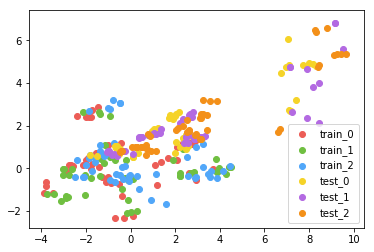

In [26]:
legends = []
plt.scatter(X_train_r_0[:50, 0], X_train_r_0[:50, 1], label="train_0", color='#EC5D57')
plt.scatter(X_train_r_1[:50, 0], X_train_r_1[:50, 1], label="train_1", color='#70BF41')
plt.scatter(X_train_r_2[:50, 0], X_train_r_2[:50, 1], label="train_2", color='#51A7F9')
plt.scatter(X_test_r_0[:50, 0], X_test_r_0[:50, 1], label="test_0", color='#F5D328')
plt.scatter(X_test_r_1[:50, 0], X_test_r_1[:50, 1], label="test_1", color='#B36AE2')
plt.scatter(X_test_r_2[:50, 0], X_test_r_2[:50, 1], label="test_2", color='#F39019')
plt.legend()
plt.savefig('pca.pdf')

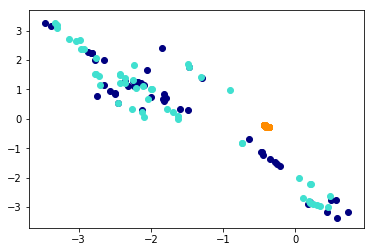

In [87]:
plt.scatter(X_train_r_1[:, 0], X_train_r_1[:, 1], color='navy')
plt.scatter(X_dev_r_1[:, 0], X_dev_r_1[:, 1], color='turquoise')
plt.scatter(X_test_r_1[:, 0], X_test_r_1[:, 1], color='darkorange')

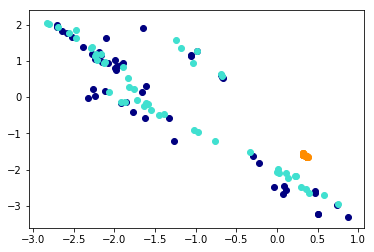

In [88]:
plt.scatter(X_train_r_2[:, 0], X_train_r_2[:, 1], color='navy')
plt.scatter(X_dev_r_2[:, 0], X_dev_r_2[:, 1], color='turquoise')
plt.scatter(X_test_r_2[:, 0], X_test_r_2[:, 1], color='darkorange')

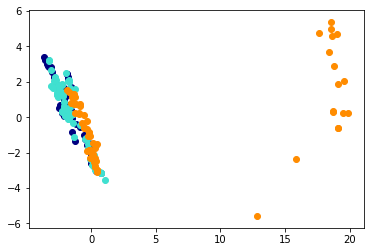

In [93]:
plt.scatter(X_train_r[:70, 0], X_train_r[:70, 1], color='navy')
plt.scatter(X_dev_r[:70, 0], X_dev_r[:70, 1], color='turquoise')
plt.scatter(X_test_r[:70, 0], X_test_r[:70, 1], color='darkorange')